In [1]:
import numpy as np
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler
from keras import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [3]:
data = np.load('../data/sample_embedding_dataset_imbalanced.npy')

In [4]:
train, test = train_test_split(data)

In [5]:
X_train = train[:, :-1]
y_train = train[:, -1]
X_test = test[:, :-1]
y_test = test[:, -1]

In [23]:
lr_classifier = LogisticRegression().fit(X_train, y_train)

/home/matteo/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [24]:
lr_classifier.score(X_test, y_test)

0.8462400616440755

In [25]:
data.shape

(114204, 1251)

In [6]:
gb_classifier = GradientBoostingClassifier().fit(X_train, y_train)

In [7]:
gb_classifier.score(X_train, y_train)

0.8776108250732607

In [8]:
y_test.mean()

0.18843473083254528

In [9]:
y_test_pred = gb_classifier.predict(X_test)
gb_classifier.score(X_test, y_test)

0.8678505131168786

In [11]:
f1_score(y_test, y_test_pred)

0.5602051521156312

In [12]:
roc_auc_score(y_test, y_test_pred)

0.706150494328653

In [13]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [14]:
mlp_classifier = Sequential()
mlp_classifier.add(Dense(64, activation = 'relu', input_dim=X_train_scaled.shape[1]))
mlp_classifier.add(Dropout(0.2))
mlp_classifier.add(Dense(64, activation='relu', kernel_initializer='random_normal'))
mlp_classifier.add(Dropout(0.2))
mlp_classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

mlp_classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

W1102 10:26:48.615102 140143621642048 deprecation_wrapper.py:119] From /home/matteo/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1102 10:26:48.694573 140143621642048 deprecation_wrapper.py:119] From /home/matteo/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1102 10:26:48.697477 140143621642048 deprecation_wrapper.py:119] From /home/matteo/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1102 10:26:48.711051 140143621642048 deprecation_wrapper.py:119] From /home/matteo/.local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_defa

In [15]:
mlp_classifier.fit(X_train_scaled, y_train, batch_size = 256, epochs = 100, validation_split = 0.2)

Train on 68522 samples, validate on 17131 samples
Epoch 1/100
68522/68522 [==============================] - 1s 17us/step - loss: 0.4053 - acc: 0.8188 - val_loss: 0.3396 - val_acc: 0.8489
Epoch 2/100
68522/68522 [==============================] - 1s 11us/step - loss: 0.3345 - acc: 0.8535 - val_loss: 0.3204 - val_acc: 0.8584
Epoch 3/100
68522/68522 [==============================] - 1s 11us/step - loss: 0.3130 - acc: 0.8632 - val_loss: 0.3106 - val_acc: 0.8629
Epoch 4/100
68522/68522 [==============================] - 1s 11us/step - loss: 0.2978 - acc: 0.8716 - val_loss: 0.3009 - val_acc: 0.8695
Epoch 5/100
68522/68522 [==============================] - 1s 11us/step - loss: 0.2846 - acc: 0.8780 - val_loss: 0.2954 - val_acc: 0.8723
Epoch 6/100
68522/68522 [==============================] - 1s 11us/step - loss: 0.2734 - acc: 0.8843 - val_loss: 0.2898 - val_acc: 0.8769
Epoch 7/100
68522/68522 [==============================] - 1s 11us/step - loss: 0.2641 - acc: 0.8893 - val_loss: 0.2900 - 

68522/68522 [==============================] - 1s 11us/step - loss: 0.1202 - acc: 0.9525 - val_loss: 0.3396 - val_acc: 0.8930
Epoch 60/100
68522/68522 [==============================] - 1s 11us/step - loss: 0.1185 - acc: 0.9528 - val_loss: 0.3377 - val_acc: 0.8920
Epoch 61/100
68522/68522 [==============================] - 1s 11us/step - loss: 0.1199 - acc: 0.9529 - val_loss: 0.3273 - val_acc: 0.8916
Epoch 62/100
68522/68522 [==============================] - 1s 11us/step - loss: 0.1181 - acc: 0.9524 - val_loss: 0.3366 - val_acc: 0.8927
Epoch 63/100
68522/68522 [==============================] - 1s 11us/step - loss: 0.1183 - acc: 0.9535 - val_loss: 0.3537 - val_acc: 0.8922
Epoch 64/100
68522/68522 [==============================] - 1s 11us/step - loss: 0.1189 - acc: 0.9528 - val_loss: 0.3410 - val_acc: 0.8925
Epoch 65/100
68522/68522 [==============================] - 1s 11us/step - loss: 0.1169 - acc: 0.9539 - val_loss: 0.3340 - val_acc: 0.8911
Epoch 66/100
68522/68522 [==============

In [16]:
y_test_pred = mlp_classifier.predict(X_test_scaled)
mlp_classifier.evaluate(X_test_scaled, y_test)

28551/28551 [==============================] - 0s 10us/step


[0.4127206111816173, 0.888515288433316]

In [18]:
cm = confusion_matrix(y_test, np.where(y_test_pred > 0.5, 1, 0))

In [19]:
cm

array([[22259,   912],
       [ 2271,  3109]])

In [20]:
f1_score(y_test, np.where(y_test_pred > 0.5, 1, 0))

0.6614189979789384

In [21]:
roc_auc_score(y_test, y_test_pred)

0.9100808575454609

Normalized confusion matrix


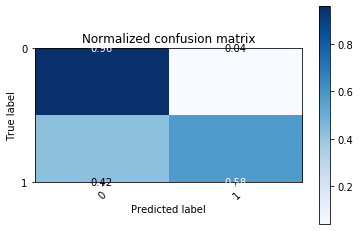

In [22]:
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
#     classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
#     fig.tight_layout()
    return ax


# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, np.where(y_test_pred > 0.5, 1, 0), classes=[0, 1], normalize = True,
                     );